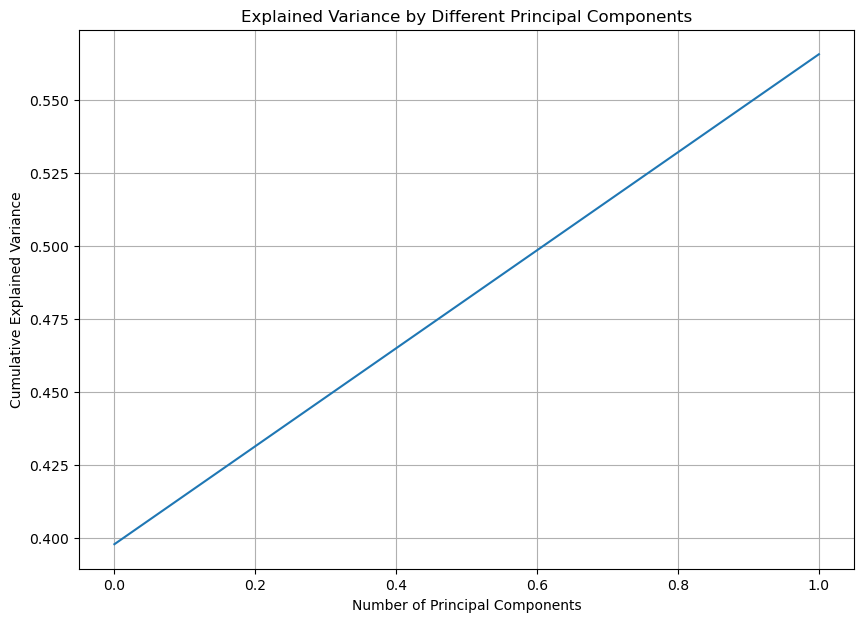

C:\Users\91779\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91779\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


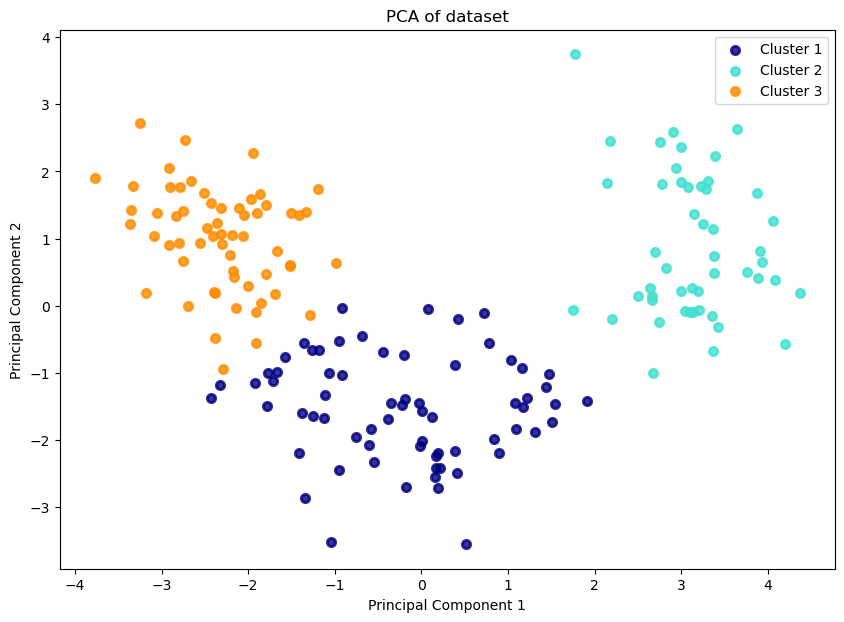

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('wine.data')

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # all rows, all columns except the last
y = df.iloc[:, -1]   # all rows, last column

# Preprocessing: scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
pca = PCA(n_components=2)  # Change n_components as needed
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
# (This step is just for analysis; adjust n_components based on the outcome)
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()

# Clustering with K-Means
n_clusters = 3  # Adjust based on your analysis
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Visualize the PCA results
plt.figure(figsize=(10, 7))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']
lw = 2

for color, i, target_name in zip(colors, range(n_clusters), ['Cluster 1', 'Cluster 2', 'Cluster 3']):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Note: This visualization and the clustering might need to be adjusted based on your dataset's specifics and the number of clusters you determine to be optimal.

